In [1]:
########################################################################################################################
#                                                          IMPORT                                                      #
########################################################################################################################
import torch
import sys
import os
import json
import numpy as np
sys.path.append('..')

from singleVis.SingleVisualizationModel import VisModel

from singleVis.data import NormalDataProvider

from singleVis.projector import DVIProjector,TimeVisProjector
from singleVis.eval.evaluator import Evaluator

VIS_METHOD = "DVI" # DeepVisualInsight

########################################################################################################################
#                                                     LOAD PARAMETERS                                                  #
########################################################################################################################
CONTENT_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

sys.path.append(CONTENT_PATH)
with open(os.path.join(CONTENT_PATH, "config.json"), "r") as f:
    config = json.load(f)
config = config[VIS_METHOD]

# record output information
# now = time.strftime("%Y-%m-%d-%H_%M_%S", time.localtime(time.time())) 
# sys.stdout = open(os.path.join(CONTENT_PATH, now+".txt"), "w")

SETTING = config["SETTING"]
CLASSES = config["CLASSES"]
DATASET = config["DATASET"]
PREPROCESS = config["VISUALIZATION"]["PREPROCESS"]
GPU_ID = config["GPU"]
GPU_ID = 1
EPOCH_START = config["EPOCH_START"]
EPOCH_END = config["EPOCH_END"]
EPOCH_PERIOD = config["EPOCH_PERIOD"]

# Training parameter (subject model)
TRAINING_PARAMETER = config["TRAINING"]
NET = TRAINING_PARAMETER["NET"]
LEN = TRAINING_PARAMETER["train_num"]

# Training parameter (visualization model)
VISUALIZATION_PARAMETER = config["VISUALIZATION"]
LAMBDA1 = VISUALIZATION_PARAMETER["LAMBDA1"]
LAMBDA2 = VISUALIZATION_PARAMETER["LAMBDA2"]
B_N_EPOCHS = VISUALIZATION_PARAMETER["BOUNDARY"]["B_N_EPOCHS"]
L_BOUND = VISUALIZATION_PARAMETER["BOUNDARY"]["L_BOUND"]
ENCODER_DIMS = VISUALIZATION_PARAMETER["ENCODER_DIMS"]
DECODER_DIMS = VISUALIZATION_PARAMETER["DECODER_DIMS"]
S_N_EPOCHS = VISUALIZATION_PARAMETER["S_N_EPOCHS"]
N_NEIGHBORS = VISUALIZATION_PARAMETER["N_NEIGHBORS"]
PATIENT = VISUALIZATION_PARAMETER["PATIENT"]
MAX_EPOCH = VISUALIZATION_PARAMETER["MAX_EPOCH"]

VIS_MODEL_NAME = VISUALIZATION_PARAMETER["VIS_MODEL_NAME"]
EVALUATION_NAME = VISUALIZATION_PARAMETER["EVALUATION_NAME"]



# VIS_MODEL_NAME = 'dvi_grid'

# Define hyperparameters
DEVICE = torch.device("cuda:{}".format(GPU_ID) if torch.cuda.is_available() else "cpu")

import Model.model as subject_model
net = eval("subject_model.{}()".format(NET))

# Define data_provider
data_provider = NormalDataProvider(CONTENT_PATH, net, EPOCH_START, EPOCH_END, EPOCH_PERIOD, device=DEVICE, epoch_name='Epoch',classes=CLASSES,verbose=1)


# Define visualization models
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

# Define Projector
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name=VIS_MODEL_NAME, device=DEVICE)    

########################################################################################################################
#                                                      VISUALIZATION                                                   #
########################################################################################################################

from singleVis.visualizer import visualizer

vis = visualizer(data_provider, projector, 200, "tab10")
save_dir = os.path.join(data_provider.content_path, "imgptDVI")
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-31 02:39:32.370092: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 02:39:33.246936: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-31 02:39:33.247005: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

Finish initialization...


In [29]:
# ENCODER_DIMS_LIST = [[512,256],[256,256,256,128],[128,64,2]]
# DECODER_DIMS_LIST = [[256,512],[128,256,256,256],[2,64,128]]
# ENCODER_DIMS_LIST = [[512,256,256,256],[256,256,128,128],[128,64,2]]
# DECODER_DIMS_LIST = [[256,256,256,512],[128,128,256,256],[2,64,128]]
# ENCODER_DIMS_LIST = [[512,256],[256,256,256,256],[256,2]]
# DECODER_DIMS_LIST = [[256,512],[256,256,256,256],[2,256]]
ENCODER_DIMS_LIST = [[512,256,256,256,256,2],[2,256,256,256,256,512],[512,256,256,256,256,2]]
DECODER_DIMS_LIST = [[2,256,256,256,256,512],[512,256,256,256,256,2],[2,256,256,256,256,512]]
prev_model = [VisModel(ENCODER_DIMS_LIST[0], DECODER_DIMS_LIST[0]), VisModel(ENCODER_DIMS_LIST[1], DECODER_DIMS_LIST[1]),VisModel(ENCODER_DIMS_LIST[2], DECODER_DIMS_LIST[2])]

projector1 = DVIProjector(vis_model=prev_model[0], content_path=CONTENT_PATH, vis_model_name='dvi_level1', device=DEVICE)
projector2 = DVIProjector(vis_model=prev_model[1], content_path=CONTENT_PATH, vis_model_name='dvi_level2', device=DEVICE)
projector3 = DVIProjector(vis_model=prev_model[2], content_path=CONTENT_PATH, vis_model_name='dvi_level3', device=DEVICE)

In [2]:
epoch = 81

In [18]:

train_data = data_provider.train_representation(epoch)
em1 = projector1.batch_project(epoch,train_data)
em2 = projector2.batch_project(epoch,em1)
em3 = projector3.batch_project(epoch,em2)
inv1 = projector3.batch_inverse(epoch,em3)
inv2 = projector2.batch_inverse(epoch,inv1)
inv3 = projector1.batch_inverse(epoch,inv2)

Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81


In [23]:
em1 = projector1.batch_project(epoch,train_data)
neeww = projector1.batch_inverse(epoch,em1)

Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81


In [28]:
em1 = projector2.batch_inverse(epoch,train_data)
neeww = projector1.batch_project(epoch,em1)

RuntimeError: Error(s) in loading state_dict for VisModel:
	Missing key(s) in state_dict: "encoder.6.weight", "encoder.6.bias", "decoder.6.weight", "decoder.6.bias". 
	size mismatch for encoder.0.weight: copying a param with shape torch.Size([256, 256]) from checkpoint, the shape in current model is torch.Size([256, 2]).
	size mismatch for encoder.4.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([256, 256]).
	size mismatch for encoder.4.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for decoder.0.weight: copying a param with shape torch.Size([256, 128]) from checkpoint, the shape in current model is torch.Size([256, 512]).

In [25]:
def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
pred =  data_provider.get_pred(epoch, data_provider.train_representation(epoch)).argmax(axis=1)
new_pred = data_provider.get_pred(epoch, inv3).argmax(axis=1)
k = 0
b = 0
old_border_list = if_border(data_provider.train_representation(epoch))
new_border_list = if_border(inv3)
for i in range(len(pred)):
    if pred[i] != new_pred[i]:
        k = k+1
        if old_border_list[i] == 1:
            b = b + 1

m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print(k,b, m)

100%|██████████| 250/250 [00:00<00:00, 3029.92it/s]


100%|██████████| 250/250 [00:00<00:00, 2868.97it/s]

1284 1129 4735


In [23]:
em2.shape

(50000, 128)

Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Computing decision regions ...
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
grid (40000, 512)
Successfully load the DVI visualization model for iteration 81
grid (40000, 2)
Successfully load the DVI visualization model for iteration 81
grid (40000, 512)


100%|██████████| 250/250 [00:00<00:00, 8797.15it/s]


Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81


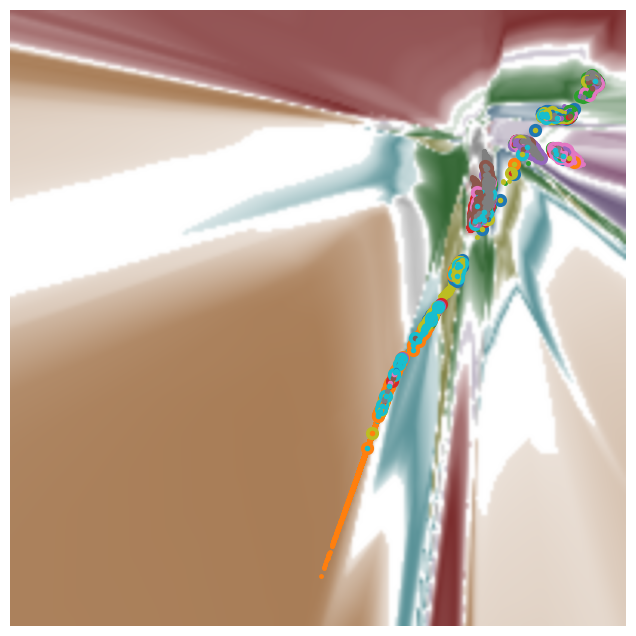

In [20]:
epoch = 81
from singleVis.viserLevel import visualizer
border = data_provider.border_representation(epoch)
projector3 = DVIProjector(vis_model=prev_model[2], content_path=CONTENT_PATH, vis_model_name='dvi_level3', device=DEVICE) 
vis = visualizer(data_provider, [projector1,projector2,projector3], 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


TypeError: object of type 'DVIProjector' has no len()

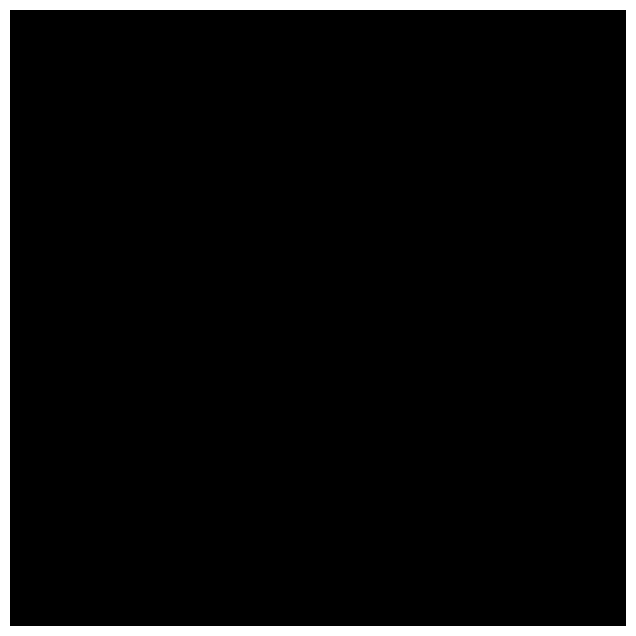

In [5]:
epoch = 60
from singleVis.viserLevel import visualizer
border = data_provider.border_representation(epoch)
projector3 = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_init', device=DEVICE) 
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


Successfully load the DVI visualization model for iteration 81
Computing decision regions ...
Successfully load the DVI visualization model for iteration 81
Successfully load the DVI visualization model for iteration 81
grid_samples (40000, 512)


100%|██████████| 250/250 [00:00<00:00, 8794.71it/s]


Successfully load the DVI visualization model for iteration 81


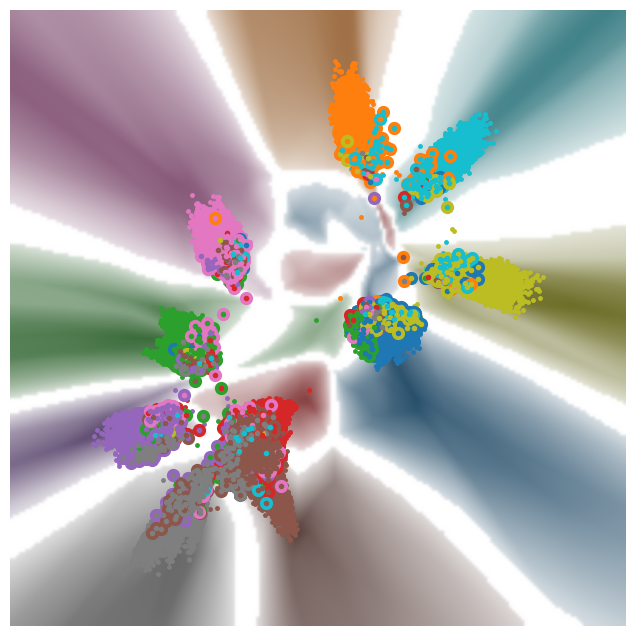

In [22]:
epoch = 81
from singleVis.visualizer import visualizer
border = data_provider.border_representation(epoch)
projector3 = DVIProjector(vis_model=prev_model[2], content_path=CONTENT_PATH, vis_model_name='dvi_level3', device=DEVICE) 
vis = visualizer(data_provider, projector1, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))

In [3]:
epoch = 80
from trustVis.data_generation import DataGeneration
dataGeneration = DataGeneration(net, data_provider,epoch,data_provider.DEVICE)

In [11]:
a,b = dataGeneration.gen_specific_class_adv(epsilon=0.05,sample_ratio=0.1,target_label=6,from_label=3)

sampeled data:500
generating class 3 's adversary sampes for target6, num of adv500
adversarial_samples_torch torch.Size([500, 3, 32, 32])


100%|██████████| 3/3 [00:00<00:00, 142.86it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


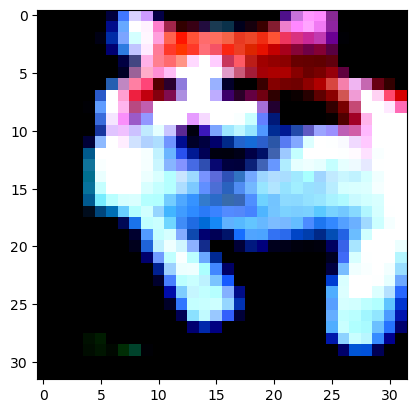

In [12]:
img_tensor = a[0]
img_tensor = img_tensor.detach().cpu()
import matplotlib.pyplot as plt
img = img_tensor.permute(1, 2, 0)

plt.imshow(img)
plt.show()

In [20]:
grid_high = b
grid_emd = projector.batch_project(epoch, grid_high)
def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
border = if_border(grid_high)
from singleVis.visualizer_hlb_ import visualizer
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.show_grid_embedding(epoch=epoch, data=grid_high, border=border, embedding=grid_emd, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 80


TypeError: expected np.ndarray (got int)

In [10]:
epoch = 130

def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='trustvis', device=DEVICE)  
# projector = TimeVisProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='vis', device=DEVICE)
training_emd = projector.batch_project(epoch, data_provider.train_representation(epoch))

training_new_data = projector.batch_inverse(epoch,training_emd )
pred =  data_provider.get_pred(epoch, data_provider.train_representation(epoch)).argmax(axis=1)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)
k = 0
b = 0
old_border_list = if_border(data_provider.train_representation(epoch))
new_border_list = if_border(training_new_data)
for i in range(len(pred)):
    if pred[i] != new_pred[i]:
        k = k+1
        if old_border_list[i] == 1:
            b = b + 1

m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print('vis error num:',k,'vis error on boundary: ', b ,'boundary flip:',m )

Successfully load the DVI visualization model for iteration 130
Successfully load the DVI visualization model for iteration 130


100%|██████████| 250/250 [00:00<00:00, 8756.74it/s]


vis error num: 99 vis error on boundary:  95 boundary flip: 1154


In [1]:
epoch = 130
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


ModuleNotFoundError: No module named 'singleVis'

Successfully load the DVI visualization model for iteration 110
Computing decision regions ...
Successfully load the DVI visualization model for iteration 110
Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 8656.33it/s]


Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 8622.09it/s]


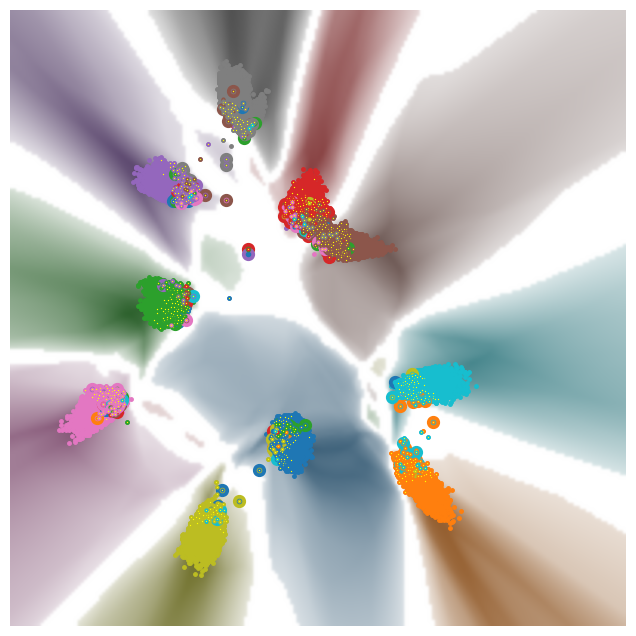

In [3]:
epoch = 110
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


Successfully load the DVI visualization model for iteration 110
Computing decision regions ...
Successfully load the DVI visualization model for iteration 110
Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 7596.84it/s]


Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 8578.22it/s]


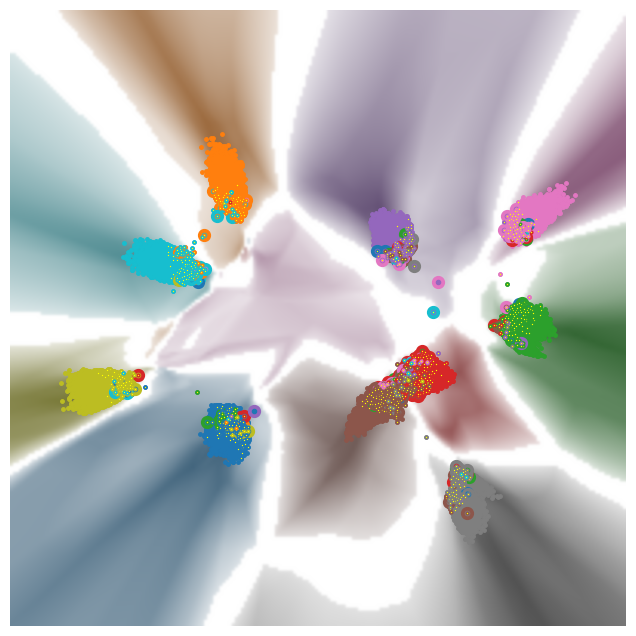

In [76]:
epoch = 110
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


Successfully load the DVI visualization model for iteration 130
Computing decision regions ...
Successfully load the DVI visualization model for iteration 130
Successfully load the DVI visualization model for iteration 130


100%|██████████| 250/250 [00:00<00:00, 8569.46it/s]


Successfully load the DVI visualization model for iteration 130


100%|██████████| 250/250 [00:00<00:00, 8591.36it/s]


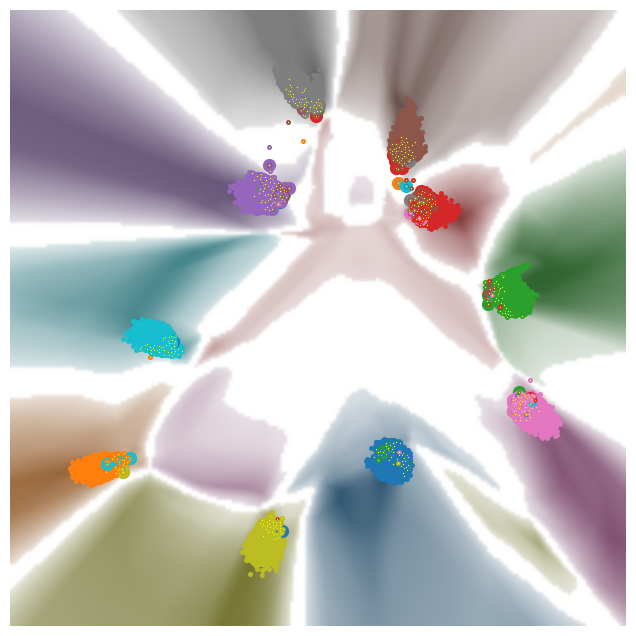

In [91]:
epoch = 130
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


In [1]:
epoch = 110
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


ModuleNotFoundError: No module named 'singleVis'

Successfully load the DVI visualization model for iteration 110
Computing decision regions ...
Successfully load the DVI visualization model for iteration 110
Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 5813.28it/s]


Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 4896.57it/s]


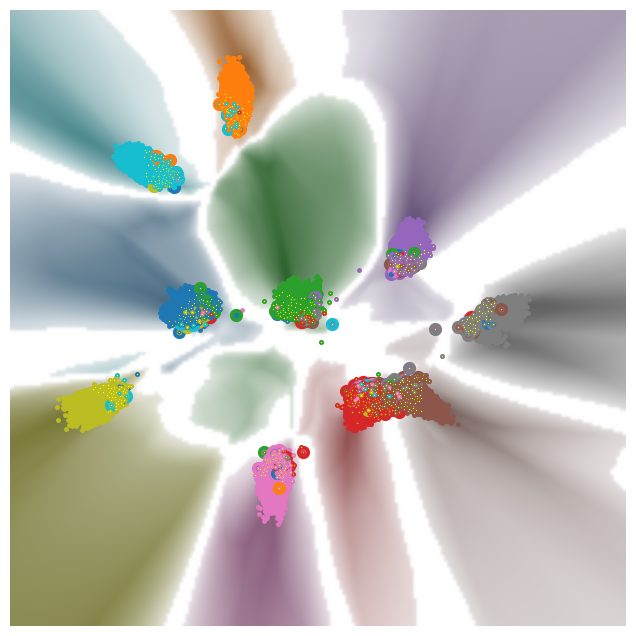

In [20]:
epoch = 110
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


Successfully load the DVI visualization model for iteration 110
Computing decision regions ...
Successfully load the DVI visualization model for iteration 110
Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 8816.38it/s]


Successfully load the DVI visualization model for iteration 110


100%|██████████| 250/250 [00:00<00:00, 8729.99it/s]


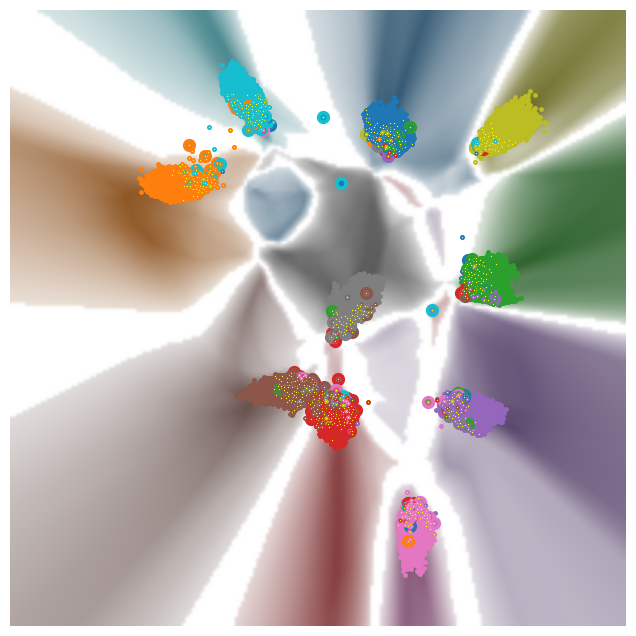

In [106]:
epoch = 110
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


Successfully load the DVI visualization model for iteration 150
Computing decision regions ...
Successfully load the DVI visualization model for iteration 150
Successfully load the DVI visualization model for iteration 150


100%|██████████| 250/250 [00:00<00:00, 8978.76it/s]


Successfully load the DVI visualization model for iteration 150


100%|██████████| 250/250 [00:00<00:00, 9008.93it/s]


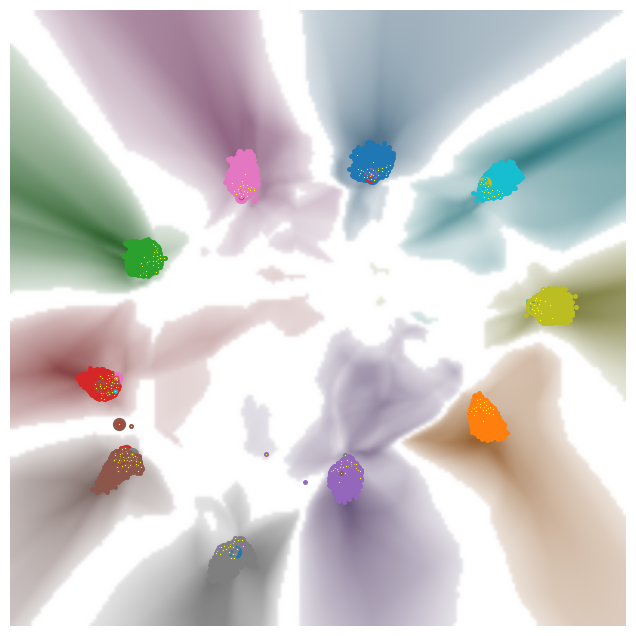

In [9]:
epoch = 150
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='trustvis', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


In [ ]:
epoch = 80
from singleVis.visualizer_hlb_ import visualizer
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_init', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvi_grid')))
# vis.get_background(15,200)


In [ ]:
epoch = 150
def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
from trustVis.data_generation import DataGeneration
dataGeneration = DataGeneration(net, data_provider,epoch,data_provider.DEVICE)

        # _,adv_X = dataGeneration.gen(epsilon=0.1,sample_ratio=0.5)
        # border_elements = np.load(os.path.join(self.data_provider.content_path,"Model", "Epoch_{:d}".format(self.iteration-1), "border_centers.npy"))
# border_elements = dataGeneration.get_near_epoch_border(epoch)
borders = data_provider.border_representation(epoch)
# let's assume X is your data
noise_scale = 0.05
noise = np.random.normal(loc=0, scale=noise_scale, size=borders.shape)
X_perturbed = borders 

border = if_border(X_perturbed)
border_elements_emd = projector.batch_project(epoch, X_perturbed)
vis.show_grid_embedding(epoch=epoch, data=X_perturbed, border=border, embedding=border_elements_emd, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

In [2]:
epoch = 150
data = data_provider.train_representation(epoch)
noise_scale = 1
noise = np.random.normal(loc=0, scale=noise_scale, size=data.shape)
X_perturbed = data + noise


def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
training_emd = projector.batch_project(epoch, X_perturbed)

training_new_data = projector.batch_inverse(epoch,training_emd )
pred_o =  data_provider.get_pred(epoch, X_perturbed)
pred =  data_provider.get_pred(epoch, X_perturbed).argmax(axis=1)
new_pred_o = data_provider.get_pred(epoch, training_new_data)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)

k = 0
b = 0
old_border_list = if_border(X_perturbed)
borderrr = X_perturbed[old_border_list==1]
new_border_list = if_border(training_new_data)
for i in range(len(pred)):
    # dist = np.linalg.norm(pred[i] - new_pred[i])
    # if dist > 0.5:
    #     k = k+1
    if pred[i] != new_pred[i]:
        k = k+1
        if old_border_list[i] == 1:
            b = b + 1

m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print('add perturb ', ' in Epoch',epoch, ' vis error num:',k,'vis error on boundary: ', b,"training data on boundary ",len(borderrr) ,'boundary flip:',m )

Successfully load the DVI visualization model for iteration 150


RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 14.75 GiB total capacity; 149.34 MiB already allocated; 40.94 MiB free; 152.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [105]:
epoch = 130

def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
training_emd = projector.batch_project(epoch, data_provider.train_representation(epoch))

training_new_data = projector.batch_inverse(epoch,training_emd )
pred_o =  data_provider.get_pred(epoch, data_provider.train_representation(epoch))
pred =  data_provider.get_pred(epoch, data_provider.train_representation(epoch)).argmax(axis=1)
new_pred_o = data_provider.get_pred(epoch, training_new_data)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)

k = 0
b = 0
old_border_list = if_border(data_provider.train_representation(epoch))
borderrr = data_provider.train_representation(epoch)[old_border_list==1]
new_border_list = if_border(training_new_data)
for i in range(len(pred)):
    # dist = np.linalg.norm(pred[i] - new_pred[i])
    # if dist > 0.5:
    #     k = k+1
    if pred[i] != new_pred[i]:
        k = k+1
        if old_border_list[i] == 1:
            b = b + 1

m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print('TrustVis in Epoch',epoch, ' vis error num:',k,'vis error on boundary: ', b,"training data on boundary ",len(borderrr) ,'boundary flip:',m )

Successfully load the DVI visualization model for iteration 130
Successfully load the DVI visualization model for iteration 130


100%|██████████| 250/250 [00:00<00:00, 8916.46it/s]


TrustVis in Epoch 130  vis error num: 105 vis error on boundary:  100 training data on boundary  1160 boundary flip: 1154


In [6]:
epoch = 150

def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='trustvis', device=DEVICE) 
# projector = TimeVisProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='vis', device=DEVICE)
training_emd = projector.batch_project(epoch, data_provider.train_representation(epoch))

training_new_data = projector.batch_inverse(epoch,training_emd )
pred =  data_provider.get_pred(epoch, data_provider.train_representation(epoch)).argmax(axis=1)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)
k = 0
b = 0
old_border_list = if_border(data_provider.train_representation(epoch))
new_border_list = if_border(training_new_data)
for i in range(len(pred)):
    if pred[i] != new_pred[i]:
        k = k+1
        if old_border_list[i] == 1:
            b = b + 1

m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print('TrustVis in Epoch',epoch, ' vis error num:',k,'vis error on boundary: ', b ,'boundary flip:',m )

Successfully load the DVI visualization model for iteration 150
Successfully load the DVI visualization model for iteration 150


100%|██████████| 250/250 [00:00<00:00, 8784.03it/s]


TrustVis in Epoch 150  vis error num: 25 vis error on boundary:  24 boundary flip: 501


In [38]:
epoch = 80

def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_init', device=DEVICE)  
training_emd = projector.batch_project(epoch, data_provider.train_representation(epoch))

training_new_data = projector.batch_inverse(epoch,training_emd )
pred =  data_provider.get_pred(epoch, data_provider.train_representation(epoch)).argmax(axis=1)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)
k = 0
b = 0
old_border_list = if_border(data_provider.train_representation(epoch))
new_border_list = if_border(training_new_data)
for i in range(len(pred)):
    if pred[i] != new_pred[i]:
        k = k+1
        if old_border_list[i] == 1:
            b = b + 1

m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print('vis error num:',k,'vis error on boundary: ', b ,'boundary flip:',m )

Successfully load the DVI visualization model for iteration 80
Successfully load the DVI visualization model for iteration 80


100%|██████████| 250/250 [00:00<00:00, 4601.04it/s]

vis error num: 1331 vis error on boundary:  1203 boundary flip: 4760


In [37]:
epoch = 80

def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_init', device=DEVICE)  
training_emd = projector.batch_project(epoch, data_provider.test_representation(epoch))

training_new_data = projector.batch_inverse(epoch,training_emd )
pred =  data_provider.get_pred(epoch, data_provider.test_representation(epoch)).argmax(axis=1)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)
k = 0
b = 0
old_border_list = if_border(data_provider.test_representation(epoch))
new_border_list = if_border(training_new_data)
for i in range(len(pred)):
    if pred[i] != new_pred[i]:
        k = k+1
        if old_border_list[i] == 1:
            b = b + 1

m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print('vis error num:',k,'vis error on boundary: ', b ,'boundary flip:',m )

Successfully load the DVI visualization model for iteration 80
Successfully load the DVI visualization model for iteration 80


100%|██████████| 50/50 [00:00<00:00, 13717.63it/s]

vis error num: 557 vis error on boundary:  489 boundary flip: 1496
